# Chapter 11: Spatial data management - vector formats

## Shapely

[*Shapely*](https://shapely.readthedocs.io/en/stable/manual.html) is a Python package for manipulation and analysis of planar geometric objects.
While Shapely is not concerned with data formats or coordinate systems, it can be readily integrated with packages that are. Indeed, Shapely is a central and essential package to any geometry/geography related work, and many higher abstraction level packages like GeoPandas use Shapely under the hood.

### How to install *Shapely*?

We need to install the `shapely` package.

#### Anaconda - Platform independent

If you have Anaconda installed, open the *Anaconda Prompt* and type in:
```
conda update --all
conda install -c conda-forge shapely
```

*Note:* updating the currently installed packages to their most recent version can be required to avoid dependency issues.
*Note:* we install from the *conda-forge* channel, as it contains more recent versions of these packages compared to the *default* channel of Anaconda.

#### Python Package Installer (pip) - Linux

If you have standalone Python3 and Jupyter Notebook install on Linux, open a command prompt / terminal and type in:
```
pip3 install shapely
```

#### Python Package Installer (pip) - Windows

The installation of these packages is much more complicated with *pip* on Windows, because several library binaries must be installed separately or compiled from source. (E.g. the *shapely* package highly depends on the *GEOS* library.)
An easier approach is to install these packages from [Python binary wheel files](https://www.lfd.uci.edu/~gohlke/pythonlibs/).

Due to its complexity these options are only recommended for advanced Python users; and instead it is **strongly advised to use Anaconda on Windows**.

### How to use shapely?

We can either import the complete *shapely module* or just some parts of it which will be used, e.g.:
```python
from shapely import geometry
```

Now we can simply refer to e.g. the `shapely.geometry.Point` type simply as `geometry.Point`.

### Basic usage of shapely

The fundamental types of geometric objects implemented by Shapely are points, line string, polygons and their collections.

#### Creation of Shapely objects

Elementary planar geometries can be created from scratch.

Let's define a new point with the coordinate `(5,6)`.

In [1]:
from shapely import geometry

point = geometry.Point(5,6)
print(point)

POINT (5 6)


Line strings can be defined through the list of their vertices.

In [2]:
line = geometry.LineString([(6,6), (7,7), (8,9)])
print(line)

LINESTRING (6 6, 7 7, 8 9)


Polygons are closed line strings (optionally with holes). The line string is automatically closed.
The coordinates can be given with either tuples or lists.

In [3]:
rectangle1 = geometry.Polygon([[0,0], [10,0], [10,10], [0,10]])
rectangle2 = geometry.Polygon([(-4,-4), (4,-4), (4,4), (-4,4)])
print(rectangle1)
print(rectangle2)

POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))
POLYGON ((-4 -4, 4 -4, 4 4, -4 4, -4 -4))


A holed polygon can be defined as an exterior *shell* with a list of inner shells as the holes.

In [4]:
rectangle3 = geometry.Polygon([(0,0), (10,0), (10,10), (0,10)],
                              [[(2,2), (2,3), (3,3), (3,2)],
                               [(5,5), (5,7), (7,7), (7,5)]])
print(rectangle3)

POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0), (2 2, 2 3, 3 3, 3 2, 2 2), (5 5, 5 7, 7 7, 7 5, 5 5))


#### Manage Shapely objects

For points and line strings the sequence of coordinates can be accessed through the `coords` property, while the separate list of X and Y coordinates can be accessed through the `xy` property of the Shapely objects.

In [5]:
print("Coords: {0}".format(list(point.coords)))
x, y = point.xy
print("X coords: {0}".format(x))
print("Y coords: {0}".format(y))

Coords: [(5.0, 6.0)]
X coords: array('d', [5.0])
Y coords: array('d', [6.0])


In [6]:
print("Coords: {0}".format(list(line.coords)))
x, y = line.xy
print("X coords: {0}".format(x))
print("Y coords: {0}".format(y))

Coords: [(6.0, 6.0), (7.0, 7.0), (8.0, 9.0)]
X coords: array('d', [6.0, 7.0, 8.0])
Y coords: array('d', [6.0, 7.0, 9.0])


For polygons, the outer shell can be accessed as the `exterior`.
*Note: the exterior is also available for points and line strings.*

In [7]:
print("Coords: {0}".format(list(rectangle1.exterior.coords)))
x, y = rectangle1.exterior.xy
print("X coords: {0}".format(x))
print("Y coords: {0}".format(y))

Coords: [(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]
X coords: array('d', [0.0, 10.0, 10.0, 0.0, 0.0])
Y coords: array('d', [0.0, 0.0, 10.0, 10.0, 0.0])


The holes of a polygon can be accessed through the `interiors` list of the object.

In [8]:
print("Coords: {0}".format(list(rectangle3.exterior.coords)))
x, y = rectangle3.exterior.xy
print("X coords: {0}".format(x))
print("Y coords: {0}".format(y))

print("Holes:")
for hole in rectangle2.interiors:
    print(hole)


Coords: [(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]
X coords: array('d', [0.0, 10.0, 10.0, 0.0, 0.0])
Y coords: array('d', [0.0, 0.0, 10.0, 10.0, 0.0])
Holes:


Various geometric properties can be easily computed through Shapely:

In [9]:
print('Area of Rectangle1: {0:.2f}'.format(rectangle1.area))
print('Area of Rectangle2: {0:.2f}'.format(rectangle2.area))
print('Area of Rectangle2: {0:.2f}'.format(rectangle3.area))
print('Area of Line: {0:.2f}'.format(line.length))

Area of Rectangle1: 100.00
Area of Rectangle2: 64.00
Area of Rectangle2: 95.00
Area of Line: 3.65


In [10]:
print(point.distance(rectangle2))
print(line.distance(rectangle2))

2.23606797749979
2.8284271247461903


In [11]:
print('Rectangle1 contains Point: {0}'.format(rectangle1.contains(point)))
print('Rectangle2 contains Point: {0}'.format(rectangle2.contains(point)))
print('Rectangle1 contains Rectangle2: {0}'.format(rectangle1.contains(rectangle2)))
print('Rectangle1 intersects Rectangle2: {0}'.format(rectangle1.intersects(rectangle2)))


Rectangle1 contains Point: True
Rectangle2 contains Point: False
Rectangle1 contains Rectangle2: False
Rectangle1 intersects Rectangle2: True


### Read WKT strings into Shapely objects

Geometries can also be loaded using the [*well-known text* (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) format.

Well-known text (WKT) is a text markup language for representing vector geometry objects.
It is a human-readable, but verbose format. A binary equivalent, known as well-known binary (WKB) is used to transfer and store the same information in a more compact form convenient for computer processing but that is not human-readable.

WKT and WKB are understood by many applications and software libraries, including Shapely.

In [12]:
from shapely import wkt

rectangle2 = wkt.loads('POLYGON ((-4 -4, 4 -4, 4 4, -4 4, -4 -4))')
print(rectangle2)

POLYGON ((-4 -4, 4 -4, 4 4, -4 4, -4 -4))


*Note:* Shapely also displays geometries as a WKT as the default string representation.

---

## GeoPandas

[*GeoPandas*](https://geopandas.org/) is an open source project to make working with geospatial data in Python easier. GeoPandas extends the datatypes used by *pandas* to allow spatial operations on geometric types.

### Install *geopandas*

The following Python packages are required to be installed:
 - geopandas
 - descartes (for visualization)
 - mapclassify (for classification of data)
 - rtree (spatial indexing of data)

#### Anaconda - Platform independent

If you have Anaconda installed, open the *Anaconda Prompt* and type in:
```
conda update --all
conda install -c conda-forge geopandas descartes mapclassify rtree
```

*Note:* updating the currently installed packages to their most recent version can be required to avoid dependency issues.  
*Note:* we install from the *conda-forge* channel, as it contains more recent versions of these packages compared to the *default* channel of Anaconda.

#### Python Package Installer (pip) - Linux

If you have standalone Python3 and Jupyter Notebook install on Linux, open a command prompt / terminal and type in:
```
pip3 install geopandas descartes mapclassify rtree
```
For the *rtree* Python package you must also install the *libspatialindex-dev* system package, which will require administrative priviliges:
```
sudo apt-get install libspatialindex-dev
```

#### Python Package Installer (pip) - Windows

The installation of these packages is much more complicated with *pip* on Windows, because several library binaries must be installed separately or compiled from source. (E.g. the *geopandas* package highly depends on the *GDAL* library.)  
An easier approach is to install these packages from [Python binary wheel files](https://www.lfd.uci.edu/~gohlke/pythonlibs/).

Due to its complexity these options are only recommended for advanced Python users and it is **strongly advised to use Anaconda on Windows**.

### How to use *geopandas*?

The geopandas package is also a module which you can simply import. It is usually aliased with the `gpd` abbreviation.
```python
import geopandas as gpd
```

### Read spatial data

Geopandas can read many vector-based spatial data format including Shapefiles, GeoJSON files and much more. Only the `read_file()` function has to be called.
The result is a geopandas dataframe, a *GeoDataFrame*.

Read the `data/ne_10m_admin_0_countries.shp` shapefile located in the `data` folder. This dataset contains both scalar and spatial data of the countries all over the world.  
Source: [Natural Earth](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

countries_gdf = gpd.read_file('../data/ne_10m_admin_0_countries.shp')
display(countries_gdf)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,마카오,Macau,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
251,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,애시모어 카르티에 제도,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
252,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,바호 누에보 뱅크,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
253,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,세라냐 뱅크,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


GeoPandas uses Shapely to represent geometries. Observe the `geometry` column (the last one), which contains the Shapely geometry objects of the row, displayed as a string (in WKT format) in the table.

<img src="../images/11_geodataframe.png" alt="Scheme of GeoDataframe" title="Source: https://geopandas.org/" style="width: 600px; margin: auto;"/>

### Basic usage of *GeoDataFrames*

Since this *GeoDataFrame* has quite a number of columns, some of them are hidden by the display. Let's list all the columns:

In [14]:
print(countries_gdf.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

With a lot of columns it can be useful to select only a few columns to make the displayed results more human-readable.
This can be done by in a similar way when selecting a single *Series* from a *DataFrame*, but now we shall define a list of *Series* to select.  
*Remark:* this makes a copy of the dataframe.

In [15]:
countries_gdf = countries_gdf[['NAME', 'POP_EST', 'POP_YEAR', 'GDP_MD_EST', 'GDP_YEAR', 'REGION_UN', 'geometry']]
display(countries_gdf)

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,2017,863000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,2017,436100.0,2016,Americas,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,2017,78350.0,2016,Americas,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,2017,410400.0,2016,Americas,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...
250,Macao,601969,2017,63220.0,2016,Asia,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
251,Ashmore and Cartier Is.,0,2017,0.0,2016,Oceania,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
252,Bajo Nuevo Bank,0,2017,0.0,2016,Americas,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
253,Serranilla Bank,0,0,0.0,0,Americas,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Geopandas extends the capabilties of the pandas library, which means we can use all what we have learned with pandas.

Let's sort the *GeoDataFrame* by the name of the countries:

In [16]:
display(countries_gdf.sort_values(by='NAME'))

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry
129,Afghanistan,34124811,2017,64080.0,2016,Asia,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
171,Akrotiri,7850,2017,314.0,2016,Asia,"POLYGON ((33.01563 34.63442, 33.00994 34.62490..."
63,Albania,3047987,2017,33900.0,2016,Europe,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
121,Algeria,40969443,2017,609400.0,2016,Africa,"POLYGON ((-4.82161 24.99506, -4.99519 25.10209..."
242,American Samoa,51504,2017,711.0,2013,Oceania,"MULTIPOLYGON (((-170.59101 -14.26483, -170.576..."
...,...,...,...,...,...,...,...
161,Yemen,28036829,2017,73450.0,2016,Asia,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18..."
81,Zambia,15972000,2017,65170.0,2016,Africa,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629..."
108,Zimbabwe,13805084,2017,28330.0,2016,Africa,"POLYGON ((25.25978 -17.79411, 25.26671 -17.800..."
123,eSwatini,1467152,2017,11060.0,2016,Africa,"POLYGON ((31.94924 -25.95810, 31.97529 -25.980..."


Filter the dataframe to contain only the European countries:

In [17]:
condition = countries_gdf['REGION_UN'] == 'Europe'
europe_gdf = countries_gdf[condition]
display(europe_gdf)

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry
22,France,67106161,2017,2699000.0,2016,Europe,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2..."
34,Ukraine,44033874,2017,352600.0,2016,Europe,"MULTIPOLYGON (((31.76434 52.10057, 31.82584 52..."
35,Belarus,9549747,2017,165400.0,2016,Europe,"POLYGON ((23.60624 51.51740, 23.60231 51.53078..."
44,Lithuania,2823859,2017,85620.0,2016,Europe,"MULTIPOLYGON (((26.59453 55.66699, 26.60383 55..."
48,Russia,142257519,2017,3745000.0,2016,Europe,"MULTIPOLYGON (((87.81632 49.16584, 87.71638 49..."
49,Czechia,10674723,2017,350900.0,2016,Europe,"POLYGON ((14.81039 50.85845, 14.83168 50.85798..."
50,Germany,80594017,2017,3979000.0,2016,Europe,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48..."
51,Estonia,1251581,2017,38700.0,2016,Europe,"MULTIPOLYGON (((24.30616 57.86819, 24.31666 57..."
52,Latvia,1944643,2017,50650.0,2016,Europe,"POLYGON ((27.35293 57.52760, 27.52817 57.52848..."
53,Norway,5320045,2017,364700.0,2016,Europe,"MULTIPOLYGON (((20.62316 69.03636, 20.36272 69..."


Sort the European countries by their population in a descending order:

In [18]:
display(europe_gdf.sort_values(by = 'POP_EST', ascending = False))

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry
48,Russia,142257519,2017,3745000.0,2016,Europe,"MULTIPOLYGON (((87.81632 49.16584, 87.71638 49..."
50,Germany,80594017,2017,3979000.0,2016,Europe,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48..."
22,France,67106161,2017,2699000.0,2016,Europe,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2..."
79,United Kingdom,64769452,2017,2788000.0,2016,Europe,"MULTIPOLYGON (((-7.24710 55.06932, -7.25674 55..."
91,Italy,62137802,2017,2221000.0,2016,Europe,"MULTIPOLYGON (((7.02208 45.92526, 7.06694 45.8..."
67,Spain,48958159,2017,1690000.0,2016,Europe,"MULTIPOLYGON (((-5.34073 35.84736, -5.36290 35..."
34,Ukraine,44033874,2017,352600.0,2016,Europe,"MULTIPOLYGON (((31.76434 52.10057, 31.82584 52..."
77,Poland,38476269,2017,1052000.0,2016,Europe,"POLYGON ((18.83320 49.51026, 18.83743 49.52695..."
74,Romania,21529967,2017,441000.0,2016,Europe,"POLYGON ((22.87760 47.94674, 22.89786 47.95098..."
94,Netherlands,17084719,2017,870800.0,2016,Europe,"MULTIPOLYGON (((7.19459 53.24502, 7.19747 53.2..."


### Spatial data management in *GeoDataFrames*

We can fetch the CRS (*coordinate reference system*) of the `geometry` column in the *GeoDataFrame*:

In [19]:
print(countries_gdf.crs)

epsg:4326


In [20]:
display(countries_gdf.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As we can observe the spatial data is in *WGS 84 (EPSG:4326)*. Since that is a geographic CRS, it would be unsuitable to calculate the area of the countries.

The geometries can be transformed on-the-fly to a different CRS with GeoPandas. Let's select a projected CRS, *Mercator (EPSG:3857)*.

In [21]:
countries_mercator = countries_gdf.to_crs('epsg:3857')

Now we the area of each geometry can be calculated in $km^2$ units:

In [22]:
countries_mercator['AREA'] = countries_mercator.area / 10**6
display(countries_mercator)

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry,AREA
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",1.901567e+06
1,Malaysia,31381992,2017,863000.0,2016,Asia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",3.317439e+05
2,Chile,17789267,2017,436100.0,2016,Americas,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.255936e+06
3,Bolivia,11138234,2017,78350.0,2016,Americas,"POLYGON ((-7737827.685 -1979875.500, -7737828....",1.194826e+06
4,Peru,31036656,2017,410400.0,2016,Americas,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.339975e+06
...,...,...,...,...,...,...,...,...
250,Macao,601969,2017,63220.0,2016,Asia,"MULTIPOLYGON (((12641286.013 2531110.377, 1264...",3.523370e+01
251,Ashmore and Cartier Is.,0,2017,0.0,2016,Oceania,"POLYGON ((13758756.865 -1394492.973, 13758838....",2.843784e+00
252,Bajo Nuevo Bank,0,2017,0.0,2016,Americas,"POLYGON ((-8904366.797 1780988.794, -8904203.7...",3.895604e-02
253,Serranilla Bank,0,0,0.0,0,Americas,"POLYGON ((-8753839.074 1788757.197, -8754210.5...",1.144447e-01


Use the `round()` function to limit the number decimal digits, hence we can get rid of the scientific notation:

In [23]:
countries_mercator['AREA'] = countries_mercator['AREA'].round(2)
display(countries_mercator)

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry,AREA
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",1901566.89
1,Malaysia,31381992,2017,863000.0,2016,Asia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",331743.88
2,Chile,17789267,2017,436100.0,2016,Americas,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1255936.02
3,Bolivia,11138234,2017,78350.0,2016,Americas,"POLYGON ((-7737827.685 -1979875.500, -7737828....",1194826.04
4,Peru,31036656,2017,410400.0,2016,Americas,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1339975.38
...,...,...,...,...,...,...,...,...
250,Macao,601969,2017,63220.0,2016,Asia,"MULTIPOLYGON (((12641286.013 2531110.377, 1264...",35.23
251,Ashmore and Cartier Is.,0,2017,0.0,2016,Oceania,"POLYGON ((13758756.865 -1394492.973, 13758838....",2.84
252,Bajo Nuevo Bank,0,2017,0.0,2016,Americas,"POLYGON ((-8904366.797 1780988.794, -8904203.7...",0.04
253,Serranilla Bank,0,0,0.0,0,Americas,"POLYGON ((-8753839.074 1788757.197, -8754210.5...",0.11


Since the Mercator projection applies great territorial distortion the calculated values can be far from real. Eg. for Hungary:

In [24]:
display(countries_mercator[countries_mercator['NAME'] == 'Hungary'])

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry,AREA
75,Hungary,9850845,2017,267600.0,2016,Europe,"POLYGON ((2546722.843 6097998.603, 2544893.518...",201566.93


For Hungary we can get a much more precise value by using a projected CRS which applies a minimal distortion on the region of Hungary.
Such a CRS is the *Uniform National Projection* named *EOV* (abbreviation of *Egységes Országos Vetület*).

In [25]:
countries_eov = countries_gdf.to_crs('EPSG:23700') # EOV is EPSG:23700 
countries_eov.set_index('NAME', drop=False, inplace=True)
countries_eov['AREA'] = countries_eov.area / 10**6
display(countries_eov.loc['Hungary'])

NAME                                                    Hungary
POP_EST                                                 9850845
POP_YEAR                                                   2017
GDP_MD_EST                                             267600.0
GDP_YEAR                                                   2016
REGION_UN                                                Europe
geometry      POLYGON ((936017.8110286188 296237.7384604304,...
AREA                                               93200.728333
Name: Hungary, dtype: object

### Map making

Geopandas provides a high-level interface to the *matplotlib* library for making maps. Mapping shapes is as easy as using the `plot()` method on a *GeoDataFrame* (or *GeoSeries*).

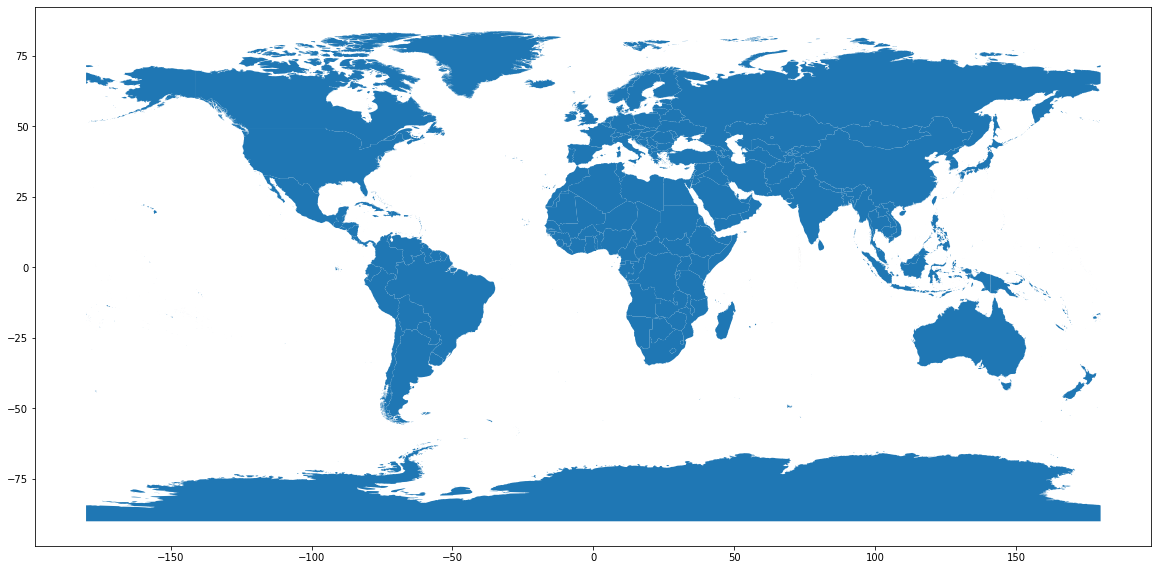

In [26]:
countries_gdf.plot(figsize=[20,10])
plt.show()

The `plot()` function call on a *GeoDataFrame* (or a regular pandas *DataFrame*) will return an axis configuration object, which we can use to further customize our plot (map in this case). E.g. we can hide the axes with the `set_axis_off()` function:

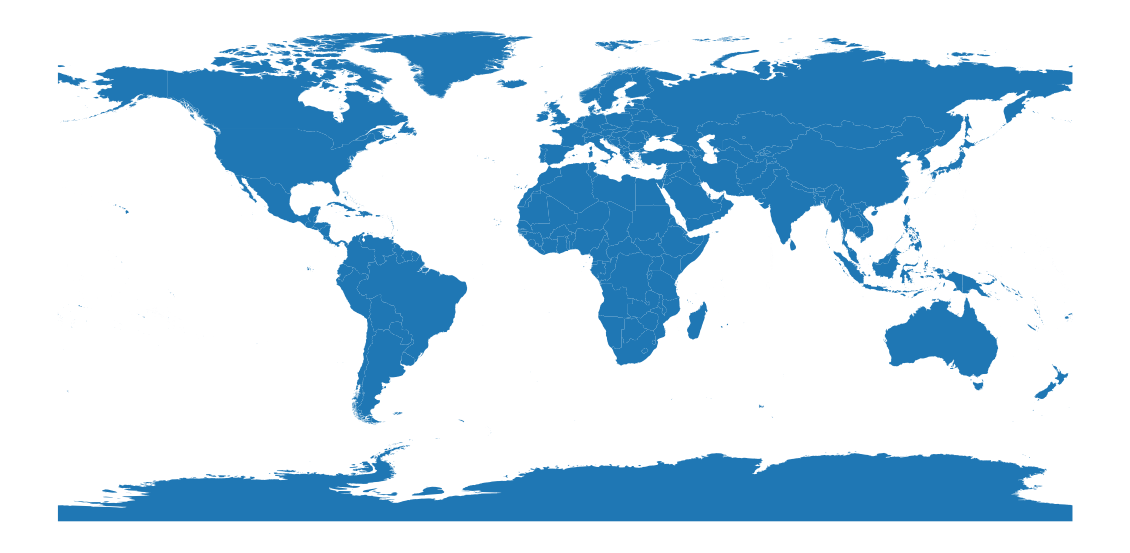

In [27]:
ax = countries_gdf.plot(figsize=[20,10])
ax.set_axis_off()
plt.show()

#### Choropleth maps

Geopandas makes it easy to create so called *choropleth maps* (maps where the color of each shape is based on the value of an associated variable). Simply use the `plot()` method with the `column` argument set to the column whose values you want used to assign colors.

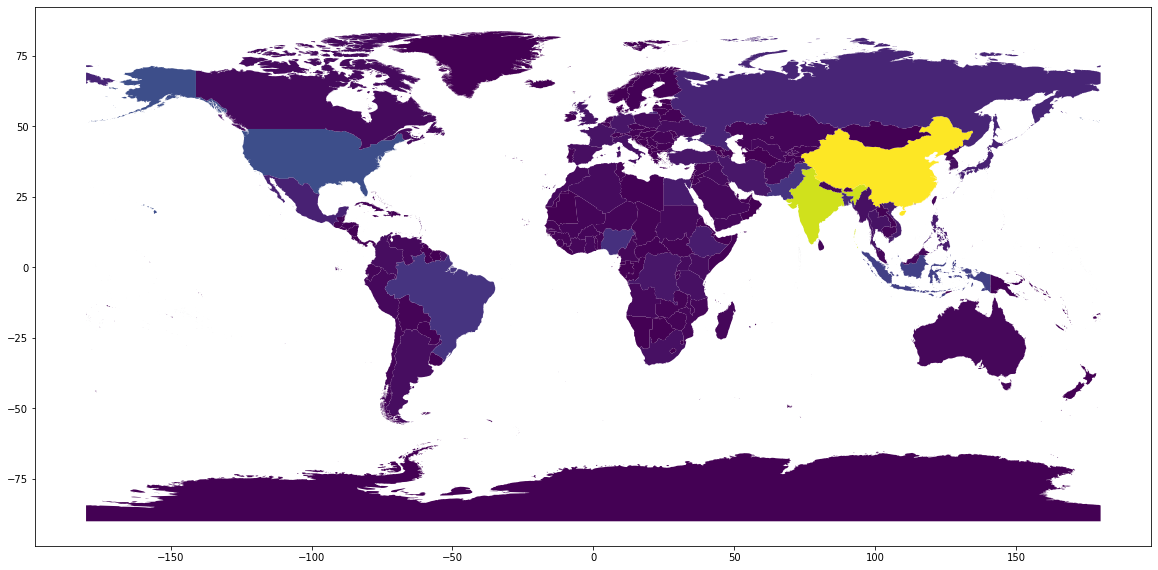

In [28]:
countries_gdf.plot(column='POP_EST', figsize=[20,10])
plt.show()

Add a legend to the map.

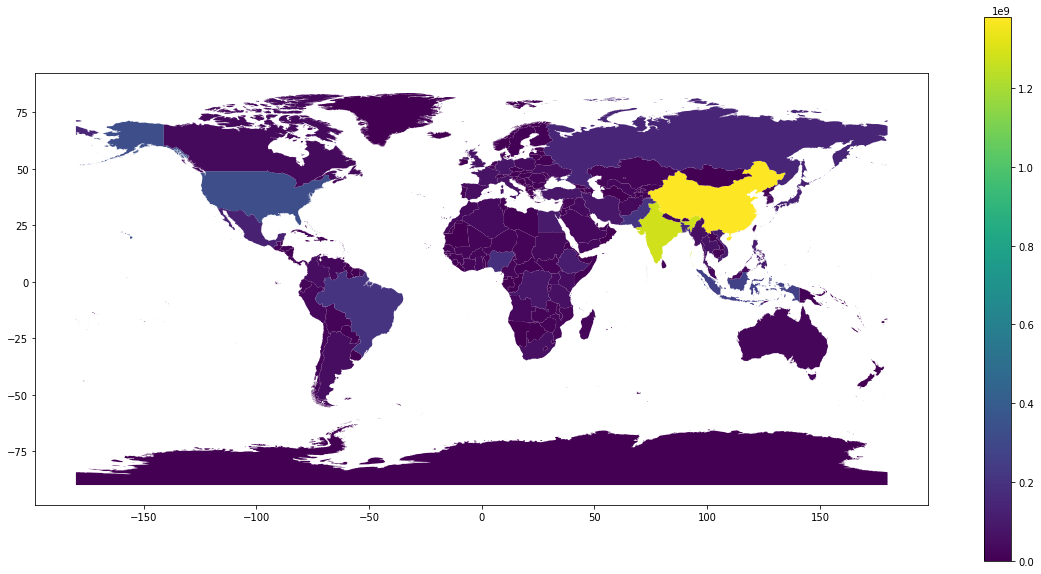

In [29]:
countries_gdf.plot(column='POP_EST', legend=True, figsize=[20,10])
plt.show()

We can choose from various available color maps. A complete list can be found on the [matplotlib website](https://matplotlib.org/tutorials/colors/colormaps.html).

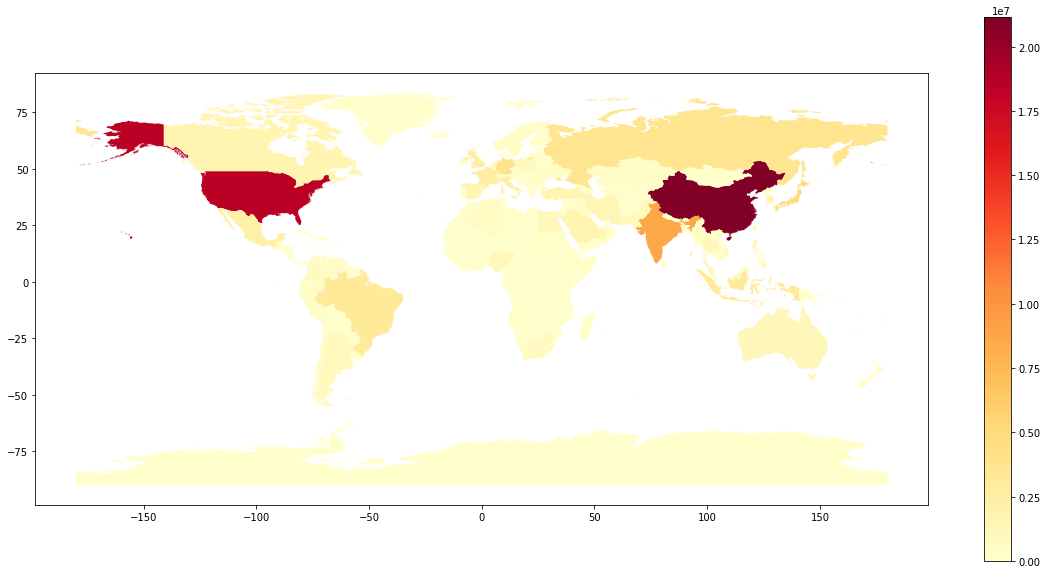

In [30]:
countries_gdf.plot(column='GDP_MD_EST', legend=True, cmap='YlOrRd', figsize=[20,10])
plt.show()

The way color maps are scaled can also be manipulated with the `scheme` option (the *mapclassify* Python library must be installed).

A full list of schemes are available on the project's [GitHub page](https://github.com/pysal/mapclassify) and some examples of result on the [package's website](
https://pysal.org/mapclassify/index.html).


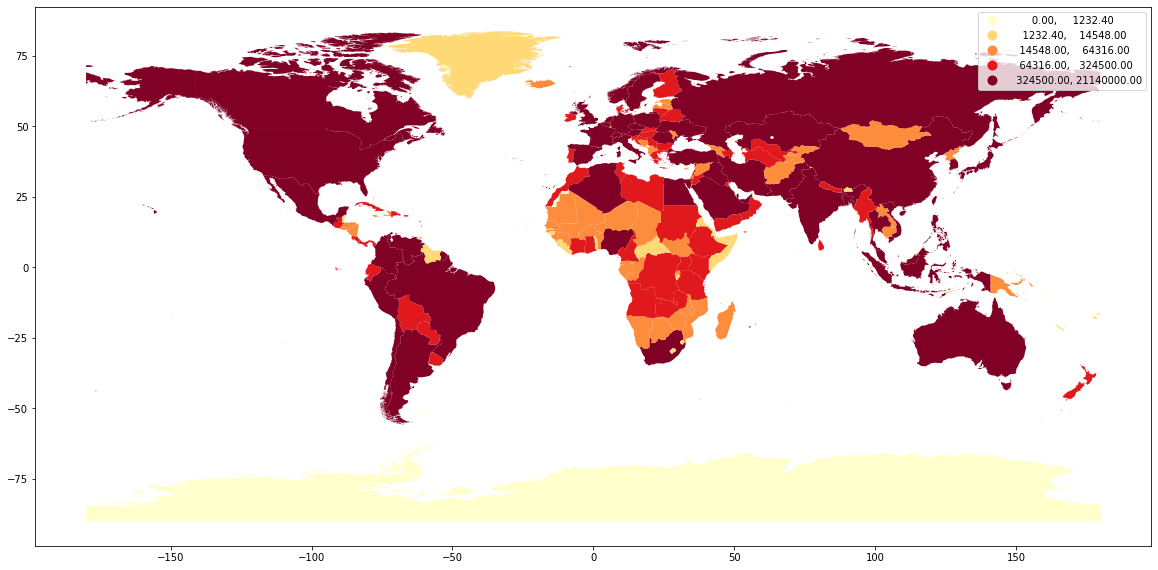

In [31]:
countries_gdf.plot(column='GDP_MD_EST', legend=True, cmap='YlOrRd', figsize=[20,10], scheme='quantiles')
plt.show()

### Multiple layers

We can easily combine the data of multiple *GeoDataFrames* and even visualize them as multiple layers with geopandas.

Open and read a second data source defined in the `data/World_Cities.shp` shapefile, containing scalar and spatial data about major cities all around the world.  
Source: [ArcGIS](https://hub.arcgis.com/datasets/6996f03a1b364dbab4008d99380370ed_0)

In [32]:
cities_gdf = gpd.read_file('../data/World_Cities.shp')
display(cities_gdf)

,FID,ObjectID,CITY_NAME,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,CNTRY_NAME,STATUS,POP,POP_RANK,POP_CLASS,PORT_ID,LABEL_FLAG,geometry
0,1001,1500,Koszalin,POL-KSZ,Koszalin,PL,Poland,Provincial capital,107450,5,"100,000 to 249,999",0,1,POINT (16.18500 54.18600)
1,1002,1200,Erzurum,TUR-ERR,Erzurum,TU,Turkey,Provincial capital,420691,4,"250,000 to 499,999",0,1,POINT (41.29200 39.90400)
2,1003,1000,Jendouba,TUN-JND,Jundubah,TS,Tunisia,Provincial capital,51408,6,"50,000 to 99,999",0,0,POINT (8.75000 36.50000)
3,1004,1501,Szczecin,POL-SZC,Szczecin,PL,Poland,Provincial capital,407811,4,"250,000 to 499,999",28823,1,POINT (14.53100 53.43800)
4,1005,1600,Rimnicu Vilcea,ROM-VIL,Vilcea,RO,Romania,Provincial capital,107558,5,"100,000 to 249,999",0,0,POINT (24.38300 45.11000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,996,395,St. Anns Bay,JAM-SAN,Saint Ann,JM,Jamaica,Provincial capital,-999,7,"Less than 50,000",10650,0,POINT (-77.19952 18.43264)
2536,997,396,Port Maria,JAM-SMA,Saint Mary,JM,Jamaica,Provincial capital,7906,7,"Less than 50,000",10680,0,POINT (-76.90000 18.37700)
2537,998,397,Port Antonio,JAM-PRT,Portland,JM,Jamaica,Provincial capital,-999,7,"Less than 50,000",10710,0,POINT (-76.38000 18.15900)
2538,999,398,Spanish Town,JAM-SCT,Saint Catherine,JM,Jamaica,Provincial capital,145018,5,"100,000 to 249,999",0,0,POINT (-76.95200 17.99500)


Reduce the number of columns, by selecting only the now important ones:

In [33]:
cities_gdf = cities_gdf[['CITY_NAME', 'CNTRY_NAME', 'STATUS', 'POP', 'geometry']]
display(cities_gdf)

,CITY_NAME,CNTRY_NAME,STATUS,POP,geometry
0,Koszalin,Poland,Provincial capital,107450,POINT (16.18500 54.18600)
1,Erzurum,Turkey,Provincial capital,420691,POINT (41.29200 39.90400)
2,Jendouba,Tunisia,Provincial capital,51408,POINT (8.75000 36.50000)
3,Szczecin,Poland,Provincial capital,407811,POINT (14.53100 53.43800)
4,Rimnicu Vilcea,Romania,Provincial capital,107558,POINT (24.38300 45.11000)
...,...,...,...,...,...
2535,St. Anns Bay,Jamaica,Provincial capital,-999,POINT (-77.19952 18.43264)
2536,Port Maria,Jamaica,Provincial capital,7906,POINT (-76.90000 18.37700)
2537,Port Antonio,Jamaica,Provincial capital,-999,POINT (-76.38000 18.15900)
2538,Spanish Town,Jamaica,Provincial capital,145018,POINT (-76.95200 17.99500)


Plot the cities:

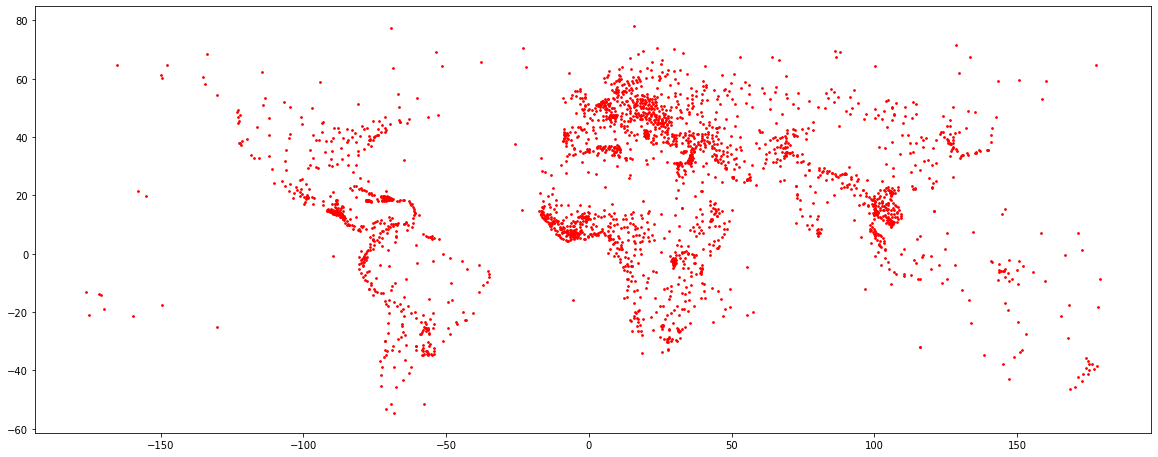

In [34]:
cities_gdf.plot(color='red', markersize=3, figsize=[20,10])
plt.show()

Verify whether both datasets use the same coordinate reference system:

In [35]:
print(cities_gdf.crs)
print(countries_gdf.crs)

epsg:4326
epsg:4326


Would be they different, geopandas would also be capable to transform one of the dataframes to the other CRS:
```python
cities_gdf = cities_gdf.to_crs(countries_gdf.crs)
```

Create a combined visualization of multiple layers, by simply calling the `plot()` method on all *GeoDataFrames*, but drawing them on the same axis object.

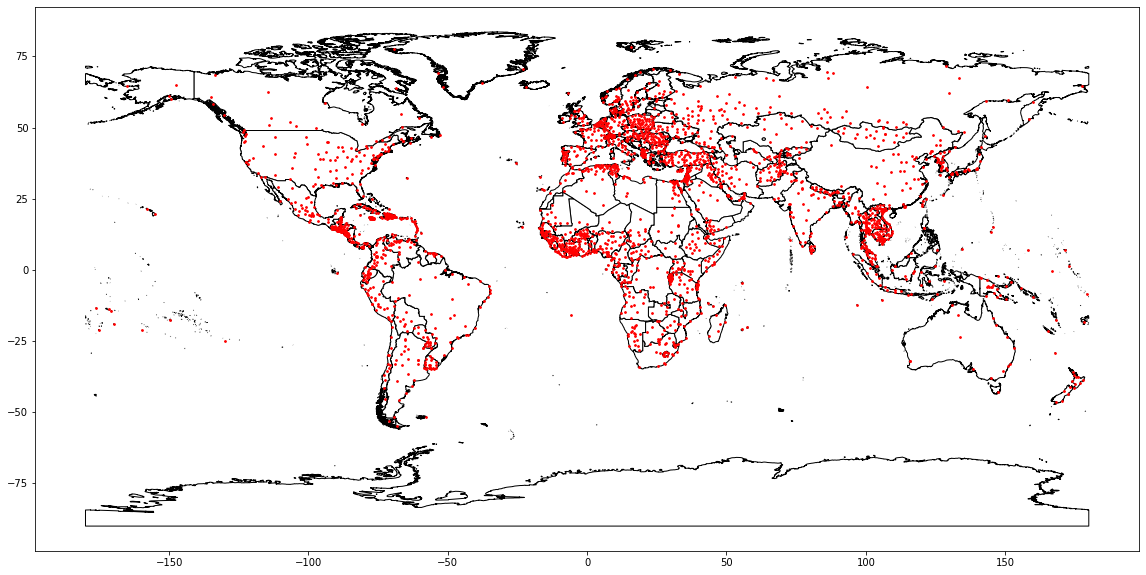

In [36]:
base = countries_gdf.plot(color='white', edgecolor='black', figsize=[20, 10])
cities_gdf.plot(ax=base, color='red', markersize=3)
plt.show()

### Basemaps *(optional)*

[*Contextily*](https://contextily.readthedocs.io/en/latest/) is a Python package to retrieve tile maps from the internet. It can add those tiles as basemap to matplotlib figures.

#### How to install *contextily*?

```
conda install -c conda-forge contextily
```

#### How to install *contextily*?

The contextily package is also a module which you can simply import. It is usually aliased with the `ctx` abbreviation.
```python
import contextily as ctx
```

The basemap tiles are in the Web Mercator (EPSG:3857) projection. To use them, we must convert our dataset to this CRS first.

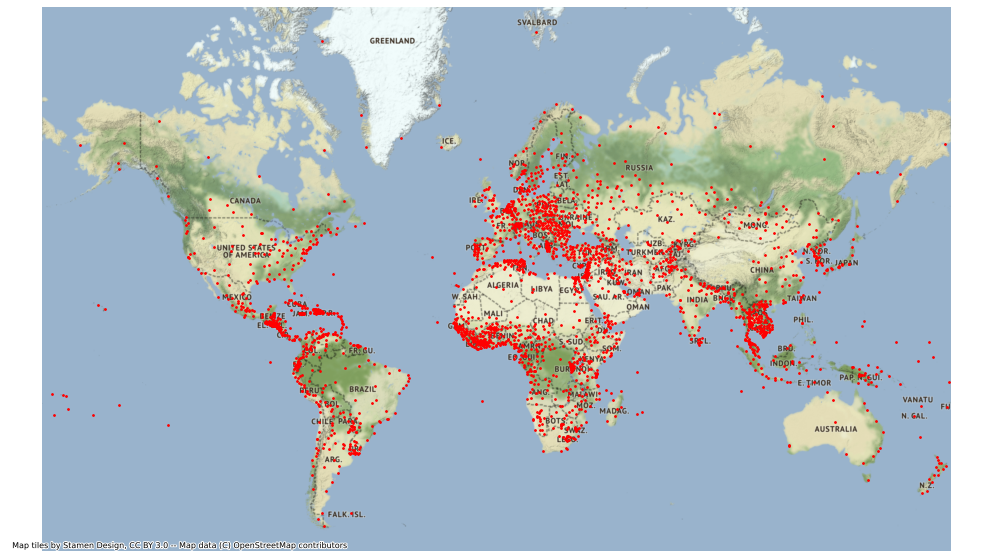

In [37]:
import contextily as ctx

# Convert dataset to Web Mercator (EPSG:3857)
cities_mercator = cities_gdf.to_crs('epsg:3857')

ax = cities_mercator.plot(figsize=[20, 10], color='red', markersize=3)
ctx.add_basemap(ax)
ax.set_axis_off()
plt.show()

The same journey can be travelled in the opposite direction by leaving your data untouched and warping the tiles coming from the web.

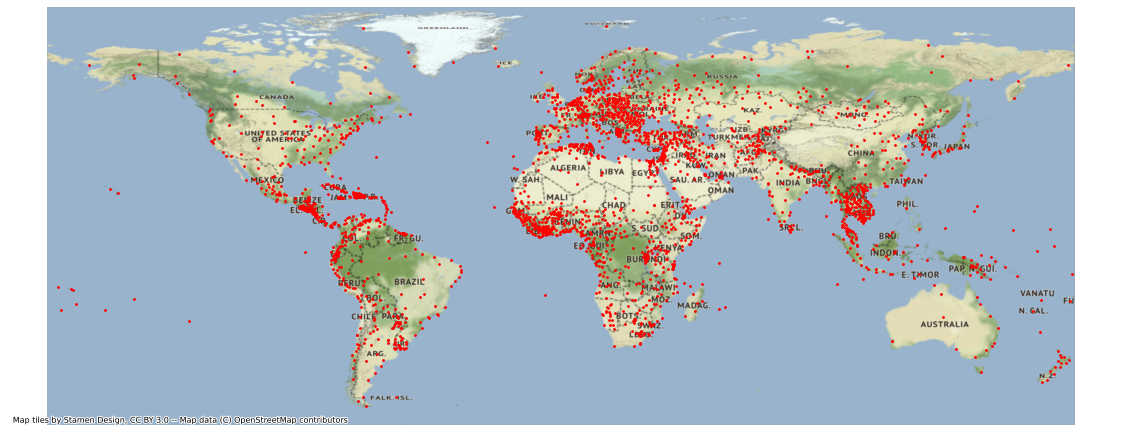

In [38]:
import contextily as ctx

ax = cities_gdf.plot(figsize=[20, 10], color='red', markersize=3)
ctx.add_basemap(ax, crs=cities_gdf.crs)
ax.set_axis_off()
plt.show()

*Note:* it is also possible to convert both dataset and the basemap tiles into a different, third CRS.

### Clipping operation

Geopandas offers a coordinate indexer (`cx`), which can be used to select only the records which geomtry overlaps with the selected region.

Let's select and plot the countries in the northern hemisphere.

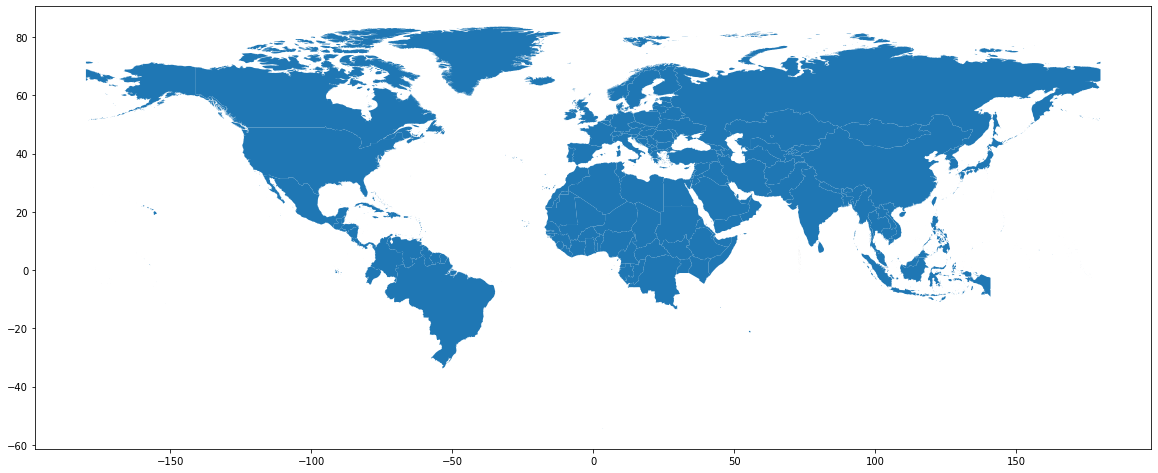

In [39]:
northern_gdf = countries_gdf.cx[:, 0:]
northern_gdf.plot(figsize=[20, 10])
plt.show()

*Note:* with this approach countries overlapping both the northern and southern hemispheres are not clipped.

We can perform real clipping with the `clip()` function of geopandas. As a showcase let's clip the countries and country parts inside the bounding box of Europe; defined with the following polygon (given in WKT format):  
`POLYGON ((-10 35, 40 35, 40 70, -10, 70, -10, 35))`.

Geopandas uses the Shapely library in the background to represent and manipulate vector data. Therefore, first we define a regular pandas *DataFrame* named `europe_df`, where the *Coordinates* column will contain a polygon defined with *Shapely*.

In [40]:
import pandas as pd
from shapely.geometry import Polygon

europe_df = pd.DataFrame({
    'Name': ['Europe'],
    'Coordinates': [Polygon([(-10, 35), (40, 35), (40, 70), (-10, 70), (-10, 35)])]
    # the polygon is defined as a closed line
})
display(europe_df)

,Name,Coordinates
0,Europe,"POLYGON ((-10 35, 40 35, 40 70, -10 70, -10 35))"


Now our *GeoDataFrame* can be constructed from the *DataFrame* stored in `europe_df`, by defining which *Series* (column) contains the geometries and the CRS. (Use the CRS of the countries dataset.)

In [41]:
europe_gdf = gpd.GeoDataFrame(europe_df, geometry='Coordinates', crs=countries_gdf.crs)
display(europe_gdf)

,Name,Coordinates
0,Europe,"POLYGON ((-10.00000 35.00000, 40.00000 35.0000..."


Finally, we can perform the clipping operation between the *GeoDataFrames*:

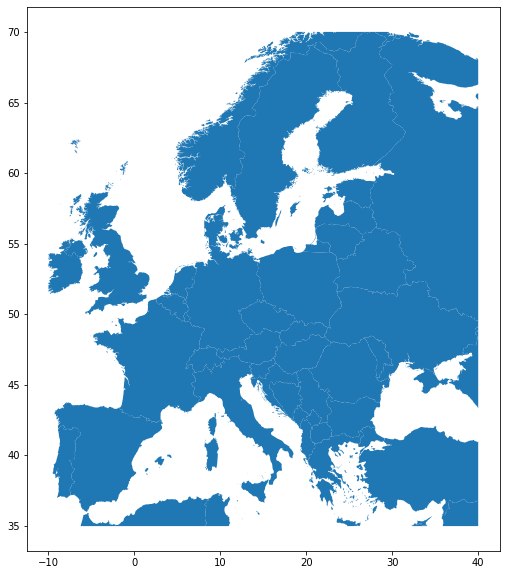

In [42]:
clipped_gdf = gpd.clip(countries_gdf, europe_gdf)
clipped_gdf.plot(figsize=[10, 10])
plt.show()

### Attribute join

In an attribute join, a *GeoDataFrame* (or a *GeoSeries*) is combined with a regular pandas *DataFrame* or *Series* based on a common variable.
(This is analogous to normal merging or joining in pandas.)

Let's read the *European countries datatset* from the `data/countries_europe.csv` file, which we used in [Chapter 9](09_tabular.ipynb).
The dataset contains the country name, capital city name, area (in km<sup>2</sup>), population (in millions) and the region data for 43 European countries respectively.  
*Data source: [EuroStat](https://ec.europa.eu/eurostat/)*

In [43]:
countries_europe = pd.read_csv('../data/countries_europe.csv', delimiter = ';')
display(countries_europe)

,Country,Capital,Area (km2),Population (millions),Region
0,Albania,Tirana,28748,3.20,Southern
1,Andorra,Andorra la Vella,468,0.07,Western
2,Austria,Vienna,83857,7.60,Western
3,Belgium,Brussels,30519,10.00,Western
4,Bosnia and Herzegovina,Sarajevo,51130,4.50,Southern
5,Bulgaria,Sofia,110912,9.00,Southern
6,Czech Republic,Prague,78864,10.40,Central
7,Denmark,Copenhagen,43077,5.10,Northern
8,United Kingdom,London,244100,57.20,Western
9,Estonia,Tallin,45100,1.60,Northern


The *attribute join* can be performed with the `merge()` method, defining the columns used for merging. (Or alternatively `left_index` and `right_index`.)

In [44]:
countries_merged = countries_gdf.merge(countries_europe, left_on='NAME', right_on='Country')
display(countries_merged)

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry,Country,Capital,Area (km2),Population (millions),Region
0,France,67106161,2017,2699000.0,2016,Europe,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2...",France,Paris,543965,56.20,Western
1,Ukraine,44033874,2017,352600.0,2016,Europe,"MULTIPOLYGON (((31.76434 52.10057, 31.82584 52...",Ukraine,Kiev,603700,51.80,Eastern
2,Belarus,9549747,2017,165400.0,2016,Europe,"POLYGON ((23.60624 51.51740, 23.60231 51.53078...",Belarus,Minsk,207600,10.30,Northern
3,Lithuania,2823859,2017,85620.0,2016,Europe,"MULTIPOLYGON (((26.59453 55.66699, 26.60383 55...",Lithuania,Vilnius,65200,3.60,Northern
4,Germany,80594017,2017,3979000.0,2016,Europe,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48...",Germany,Berlin,357042,78.60,Western
5,Estonia,1251581,2017,38700.0,2016,Europe,"MULTIPOLYGON (((24.30616 57.86819, 24.31666 57...",Estonia,Tallin,45100,1.60,Northern
6,Latvia,1944643,2017,50650.0,2016,Europe,"POLYGON ((27.35293 57.52760, 27.52817 57.52848...",Latvia,Riga,63700,2.60,Northern
7,Norway,5320045,2017,364700.0,2016,Europe,"MULTIPOLYGON (((20.62316 69.03636, 20.36272 69...",Norway,Oslo,323877,4.20,Northern
8,Sweden,9960487,2017,498100.0,2016,Europe,"MULTIPOLYGON (((20.62316 69.03636, 20.67546 69...",Sweden,Stockholm,449964,8.50,Northern
9,Finland,5491218,2017,224137.0,2016,Europe,"MULTIPOLYGON (((28.95408 69.02726, 28.83346 68...",Finland,Helsinki,338145,4.90,Northern


### Spatial join

The spatial join (`sjoin()`) function of *geopandas* performs a spatial intersection check between the records of one or two *GeoDataFrames*. (The *rtree* package must be installed for spatial indexing support.)

Let's match the countries and cities based on their spatial location:

In [45]:
display(gpd.sjoin(countries_gdf, cities_gdf))

,NAME,POP_EST,POP_YEAR,GDP_MD_EST,GDP_YEAR,REGION_UN,geometry,index_right,CITY_NAME,CNTRY_NAME,STATUS,POP
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",1358,Jayapura,Indonesia,Provincial capital,134895
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",1353,Kupang,Indonesia,Provincial capital,282396
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",1347,Denpasar,Indonesia,Provincial capital,405923
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",1341,Mataram,Indonesia,Provincial capital,318674
0,Indonesia,260580739,2017,3028000.0,2016,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",1178,Yogyakarta,Indonesia,Provincial capital,636660
...,...,...,...,...,...,...,...,...,...,...,...,...
246,Bahrain,1410942,2017,66370.0,2016,Asia,"POLYGON ((50.55161 26.19424, 50.59474 26.16031...",591,Sitrah,Bahrain,Provincial capital,37657
246,Bahrain,1410942,2017,66370.0,2016,Asia,"POLYGON ((50.55161 26.19424, 50.59474 26.16031...",589,Ar Rifa,Bahrain,Provincial capital,-999
246,Bahrain,1410942,2017,66370.0,2016,Asia,"POLYGON ((50.55161 26.19424, 50.59474 26.16031...",586,Jidd Hafs,Bahrain,Provincial capital,31735
246,Bahrain,1410942,2017,66370.0,2016,Asia,"POLYGON ((50.55161 26.19424, 50.59474 26.16031...",584,Manama,Bahrain,National and provincial capital,147074


Limit the number of columns displayed to get an output easier to interpret:

In [46]:
display(gpd.sjoin(countries_gdf, cities_gdf)[['NAME', 'CITY_NAME']])

,NAME,CITY_NAME
0,Indonesia,Jayapura
0,Indonesia,Kupang
0,Indonesia,Denpasar
0,Indonesia,Mataram
0,Indonesia,Yogyakarta
...,...,...
246,Bahrain,Sitrah
246,Bahrain,Ar Rifa
246,Bahrain,Jidd Hafs
246,Bahrain,Manama


Select the cities inside Hungary for a quick verification of the results:

In [47]:
condition = countries_gdf['NAME'] == 'Hungary'
hungary_gdf = countries_gdf[condition]
display(gpd.sjoin(hungary_gdf, cities_gdf)[['NAME', 'CITY_NAME']])

,NAME,CITY_NAME
75,Hungary,Pecs
75,Hungary,Szeged
75,Hungary,Szekszard
75,Hungary,Kaposvar
75,Hungary,Bekescsaba
75,Hungary,Zalaegerszeg
75,Hungary,Kecskemet
75,Hungary,Veszprem
75,Hungary,Szolnok
75,Hungary,Szekesfehervar


Perform a spatial intersection check between the dataframe containing only Hungary (`hungary_gdf`) and the dataframe containing all countries (`countries_gdf`). The result shall be the neighbouring countries of Hungary.

In [48]:
display(gpd.sjoin(hungary_gdf, countries_gdf)[['NAME_left', 'NAME_right']])

,NAME_left,NAME_right
75,Hungary,Romania
75,Hungary,Ukraine
75,Hungary,Serbia
75,Hungary,Croatia
75,Hungary,Slovenia
75,Hungary,Hungary
75,Hungary,Austria
75,Hungary,Slovakia


*Remark:* the `NAME` column was renamed to `NAME_left` and `NAME_right` automatically, since column names must be unique.

### Writing spatial data

*GeoDataFrames* can be easily persisted with the `to_file()` function. As when reading files, various file formats are supported again.

In [49]:
clipped_gdf.to_file('11_clipped.shp')
#clipped_gdf.to_file('11_clipped2.geojson', driver='GeoJSON')

---

## Summary exercises on vector data management

Beside the `countries_gdf` *GeoDataFrame*, read the `data/ne_10m_rivers_lake_centerlines.shp` shapefile located in the `data` folder. This dataset contains both scalar and spatial data of the larger rivers and lakes around the world.  
Source: [Natural Earth](https://www.naturalearthdata.com/downloads/10m-physical-vectors/)

In [50]:
rivers_gdf = gpd.read_file('../data/ne_10m_rivers_lake_centerlines.shp')
display(rivers_gdf)

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"LINESTRING (104.61476 12.38203, 104.61769 12.3..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"LINESTRING (37.73951 59.07954, 37.75733 59.103..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"LINESTRING (38.47804 59.21666, 38.48528 59.228..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2050Lake Centerline,10.0,Lake Centerline,Tekapo,None,2050,None,7.2,Tekapo,8.2,...,Tekapo,None,None,None,None,None,None,4,1159129651,"LINESTRING (170.21121 -44.34292, 170.20854 -44..."
1450,2049Lake Centerline,10.0,Lake Centerline,Ohau,None,2049,None,7.2,Ohau,8.2,...,None,None,None,None,None,None,None,4,1159129657,"LINESTRING (170.19260 -44.34343, 170.20050 -44..."
1451,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio Pó,По,Po,Po Nehri,Sông Po,波河,4,1159129663,"MULTILINESTRING ((7.64746 44.83906, 7.61408 44..."
1452,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"MULTILINESTRING ((3.07819 46.98509, 3.07171 46..."


### Exercise 1

Visualize the country boundaries and the river/lake layers on the same map. (Rivers and lakes shall be blue.)

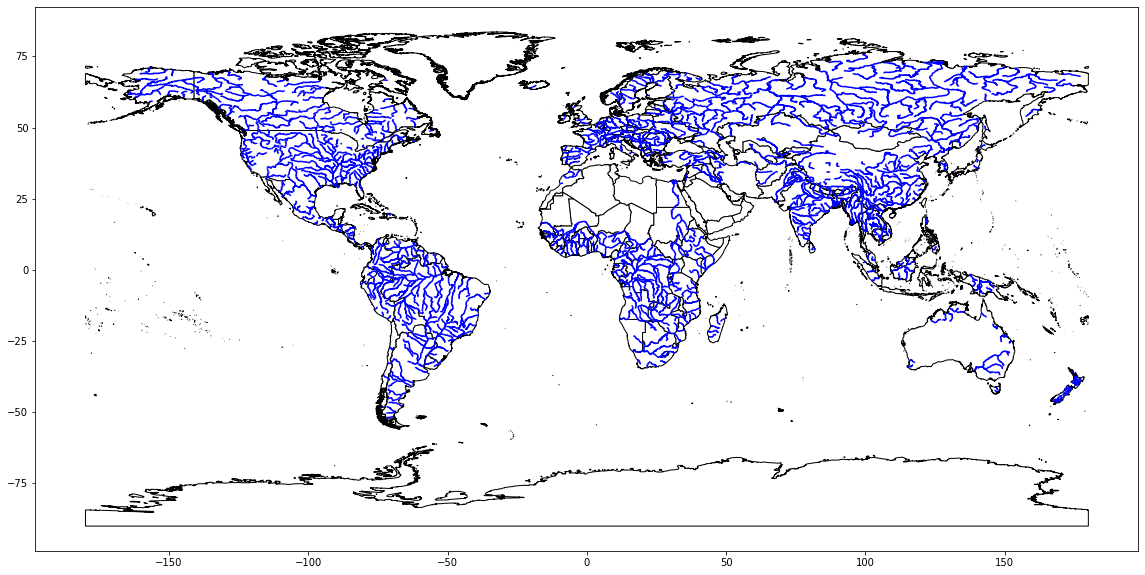

In [51]:
base = countries_gdf.plot(color='white', edgecolor='black', figsize=[20, 10])
rivers_gdf.plot(ax=base, color='blue')
plt.show()

### Exercise 2

Visualize only Hungary (on any preferred country) and the rivers flowing through it.

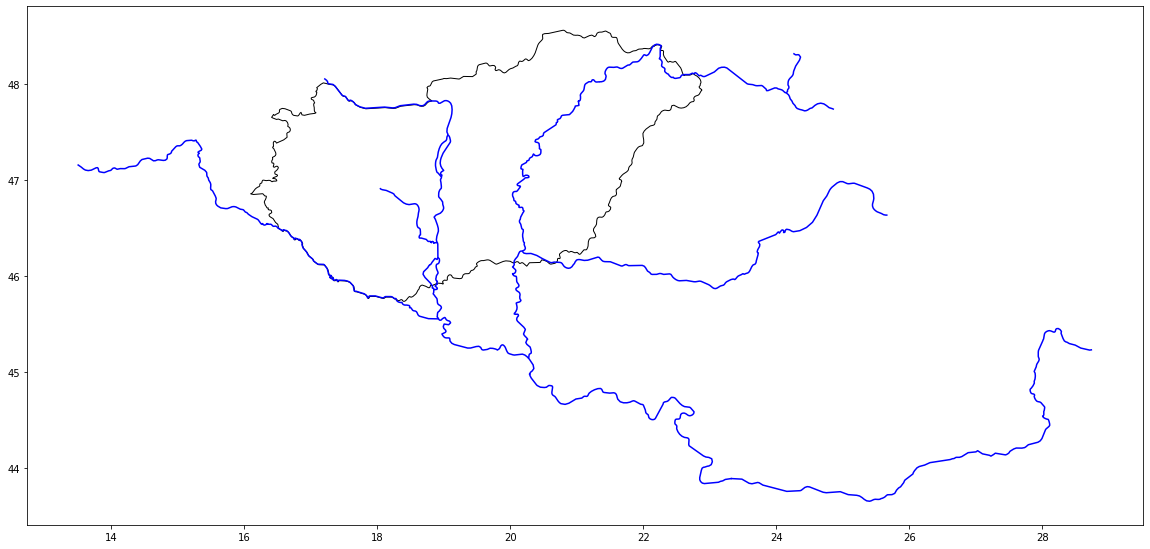

In [52]:
hungary_gdf = countries_gdf[countries_gdf['NAME'] == 'Hungary']
hungary_rivers = gpd.sjoin(rivers_gdf, hungary_gdf)

base = hungary_gdf.plot(color='white', edgecolor='black', figsize=[20, 10])
hungary_rivers.plot(ax=base, color='blue')
plt.show()

With clipping to country boundaries:

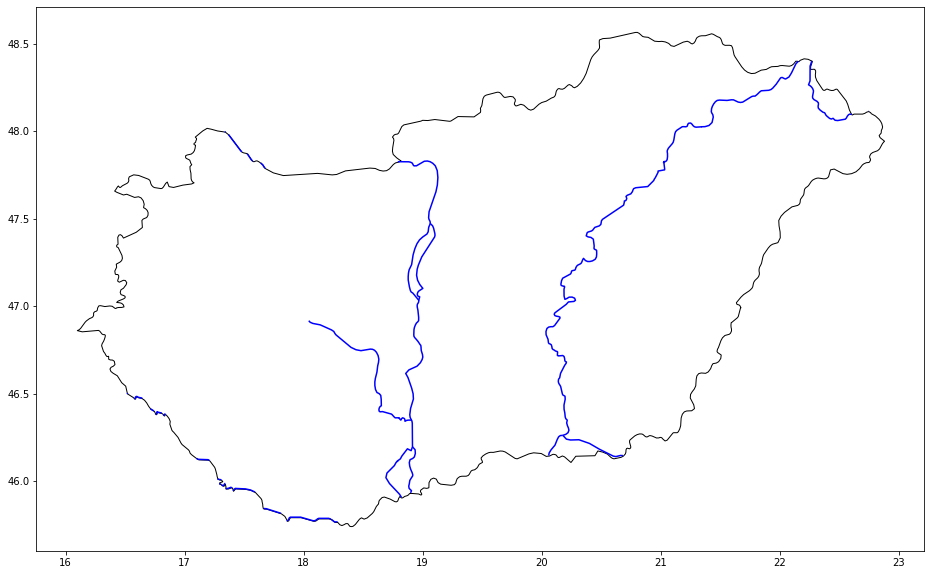

In [53]:
hungary_rivers = gpd.clip(hungary_rivers, hungary_gdf)

base = hungary_gdf.plot(color='white', edgecolor='black', figsize=[20, 10])
hungary_rivers.plot(ax=base, color='blue')
plt.show()

### Exercise 3

Determine for the river *Danube* (or any major river) that which countries it flows through.

*Hint: the river might consist of multiple line segments in the river dataset, but you can filter all of them by e.g. the `name_en` field.*

In [54]:
danube_gdf = rivers_gdf[rivers_gdf['name_en'] == 'Danube']
display(danube_gdf)

danube_countries = gpd.sjoin(danube_gdf, countries_gdf)
display(danube_countries[['NAME']])

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
389,25River,2.0,River,Danube,None,25,None,2.1,Danube,3.1,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159115307,"MULTILINESTRING ((17.20647 48.06110, 17.24293 ..."
566,38River,2.0,River,Donau,Danube,38,None,2.1,Danube,3.1,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159118769,"MULTILINESTRING ((12.50880 48.92760, 12.50660 ..."


,NAME
389,Bulgaria
389,Romania
389,Ukraine
389,Serbia
389,Croatia
389,Hungary
389,Slovakia
566,Slovakia
566,Austria
566,Germany


---

## Process the Shapely objects in a GeoDataFrame

The `data/hungary_admin_8.shp` shapefile contains the city level administrative boundaries of Hungary.  
*Data source: [OpenStreetMap](https://data2.openstreetmap.hu/hatarok/)*

Load the dataset into a GeoDataFrame, set the `NAME` column as index and convert it to the EOV coordinate reference system.

In [55]:
import geopandas as gpd

cities_admin = gpd.read_file('../data/hungary_admin_8.shp')
print("Initial CRS: {0}".format(cities_admin.crs))

cities_admin.set_index('NAME', inplace=True)
cities_admin.to_crs('epsg:23700', inplace=True) # EOV
print("Converted CRS: {0}".format(cities_admin.crs))

display(cities_admin)

Initial CRS: epsg:3857
Converted CRS: epsg:23700


,ADMIN_LEVE,geometry
NAME,,
Murakeresztúr,8,"POLYGON ((480939.034 114618.287, 480958.625 11..."
Tótszerdahely,8,"POLYGON ((473882.976 118474.207, 474009.733 11..."
Molnári,8,"POLYGON ((477975.454 117130.010, 478008.561 11..."
Semjénháza,8,"POLYGON ((480316.699 120040.067, 480358.723 12..."
Felsőszölnök,8,"POLYGON ((426404.582 173622.019, 426532.558 17..."
...,...,...
Milota,8,"POLYGON ((924402.526 310431.812, 924402.529 31..."
Tiszabecs,8,"POLYGON ((927957.308 311701.481, 928042.039 31..."
Garbolc,8,"POLYGON ((933756.183 296547.014, 933798.205 29..."


Process all the rows in the GeoDataFrame and display only the counties with an area larger than 200 km<sup>2</sup>:

In [56]:
for name, row in cities_admin.iterrows():
    geom = row['geometry']
    if geom.area / 1e6 >= 200:
        print('{0}, Area: {1:.1f} km2, Centroid: {2}'.format(name, geom.area / 1e6, geom.centroid))

Kiskunhalas, Area: 227.6 km2, Centroid: POINT (682217.376155288 120889.7788700489)
Kecskemét, Area: 321.2 km2, Centroid: POINT (698210.8659972923 174164.1829904111)
Budapest, Area: 526.1 km2, Centroid: POINT (654536.6170633805 237789.4103324989)
Szeged, Area: 281.1 km2, Centroid: POINT (734457.1375727949 101202.7389595481)
Makó, Area: 229.2 km2, Centroid: POINT (764616.0567523418 105196.5222338889)
Kiskunmajsa, Area: 221.8 km2, Centroid: POINT (701195.2067865289 125976.8081958541)
Kiskunfélegyháza, Area: 256.4 km2, Centroid: POINT (711394.699285378 153595.1949651476)
Hódmezővásárhely, Area: 491.8 km2, Centroid: POINT (752049.170236406 119773.4617392126)
Szentes, Area: 353.8 km2, Centroid: POINT (748878.6942256977 150380.3402398358)
Nagykőrös, Area: 227.9 km2, Centroid: POINT (705150.4446166748 187218.8896664693)
Mezőtúr, Area: 289.9 km2, Centroid: POINT (767931.9997580843 183535.9993907695)
Túrkeve, Area: 236.5 km2, Centroid: POINT (777218.2253021067 196820.8435386045)
Gyomaendrőd, Are

The EOV coordinates `(653812, 239106)` are inside the territory of Budapest.
Check whether really on this administrative unit contains this location.

In [57]:
pos_budapest = geometry.Point(653812, 239106)
for name, row in cities_admin.iterrows():
    geom = row['geometry']

    if geom.contains(pos_budapest):
        print(name)

Budapest
